# Analysing sound wave using fast Fourier transform

## Introduction

This Case Study will introduce you to the basic principles of signal analysis using Fast Fourier Transform (FFT) algorithm. 
Signal analysis covers everything from audio to electrical signal with applications to image processing, sound engineering, telecommunications, _etc_. 
In this Case Study we will focus specifically on audio signal/sound wave, which one can easily produce from a musical intrument or from singing a tune. 
We will then analyse this audio signal using a powerful mathematical algorithm, called Fast Fourier Transform or FFT, which allows us to decompose the audio signal in terms of its constituent frequencies.

First, we will cover the theoretical aspects, starting from Fourier series (which we learnt in MST210/MST224) to Fourier transform and discrete Fourier transform. 
We will then derive mathematically the Fast Fourier Transform algorithm. 
Once we have grasped the theoretical aspects, we will move on to practical applications, which includes recording your own audio signal, which will be then analysed using the FFT package in Numerical Python or NumPy. 
(Note that you are not required to write the algorithm yourself, Python already has a library to do this for you!) 
For example, one can study the frequency spectrum to identify specific frequencies in a particular audio signal. Finally the TMA will also include some mini-projects such as writing a simple auto-tuning software and a noise-reduction program.

By the end of this Case Study, you will have a comprehensive understanding of the Fast Fourier Transform and its significance in signal analysis. You will be equipped with the necessary knowledge and practical skills to apply the FFT algorithm in a variety of signal analysis problems, including audio processing, equalization, noise reduction, music analysis, and much more.
Whether you are interested in pursuing a career in audio engineering or simply looking to enhance your knowledge of signal analysis, this course will serve as a valuable resource to expand your understanding and proficiency in the field. So, let’s dive in and unlock the hidden secrets of sound waves through the power of Fast Fourier Transform!

## Sound wave

A sound wave consists of compression and rarefaction of air molecules, which travels through space with sound speed $c_s$.
The figure below depicts the propagation of a _sinusoidal_ sound wave inside an infinitely long rectangular channel.
The figure shows the snapshots of the air molecules (represented by blue dots in the figure) at four different instantaneous time $t=0\,\text{s}$, $0.001\,\text{s}$, $0.002\,\text{s}$, and $0.003\,\text{s}$.
The regions of high density are called the compression regions (these look like fuzzy vertical blue bands in the figure) and the regions of low density are called the rarefaction regions.
In the figure, these bands of compression and rarefaction regions travel along the positive $x$-direction with speed equals to the sound speed $c_s$.
Note that the air particles themselves do not drift in any direction.
If you track the individual particles, _e.g._ the red particle in the figure below, the particles oscillate back and forth around the same positions.
In other words, a sound wave is a propagation of energy but not mass.
The wavelength of this sinusoidal sound wave is defined by the distance between two nearest compression bands, which is equal to $\lambda=2\,\text{m}$.
As we can see from the figure, after time $t=0.003\,\text{s}$, the bands will have travelled a distance of $1\,\text{m}$.
Therefore the speed of sound in this example is equal to:
\begin{equation}
c_s = \frac{1\,\text{m}}{0.003\,\text{s}} \simeq 333\,\text{ms}^{-1}.
\end{equation}
In general, the speed of sound depends on various factors such as ambient pressure and temperature.

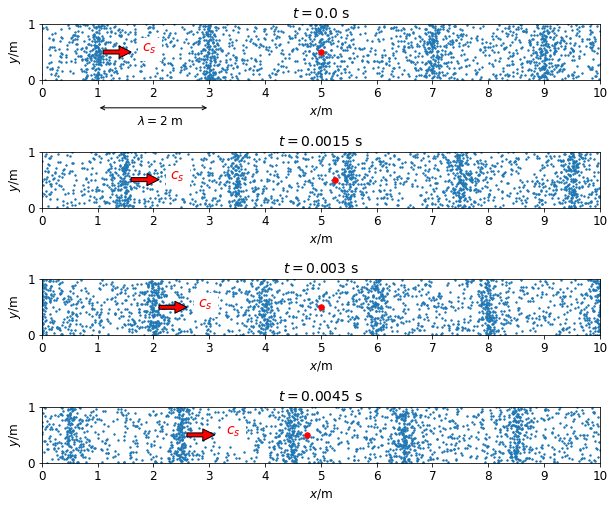

In [1]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/elsentjhung/sound-wave-analyser/master/figures/sound-wave.png')

Now suppose that that we place a microphone at the end of the channel.
The compression and rarefaction of air will cause the diaphragm inside the microphone to vibrate.
This vibration is then converted into an electrical signal, which is shown in the figure below.
The horizontal axis in the figure represents the time $t$ (in units of seconds).
The vertical axis represents the voltage of the electrical signal produced by the microphone $V(t)$ (in some rescaled units, which we do not need to worry about).
As we can see in this example, the audio signal in the figure below has a sinusoidal form, which can be descibed by a trigonometric function:
\begin{equation}
V(t) = A\cos(\omega t + \phi),
\end{equation}
where $V(t)$ is the audio signal (in some rescaled units), $t$ is time (in seconds), $A$ is the amplitude, $\omega$ is the angular frequency, and $\phi$ is the phase difference.
The angular frequency $\omega$ is related to the frequency $f$ and period $T$ of the sound wave through this relation:
\begin{equation}
\omega = 2\pi f = \frac{2\pi}{T}. 
\end{equation}
From the plot below, we can measure the period to be $T=0.006\,\text{s}$, which translates to audio frequency of $f=\frac{1}{T}\simeq167\,\text{Hz}$.
Hz (prounounced as Hertz) is the SI unit of frequency, defined to be $1\,\text{Hz}=1\,\text{s}^{-1}$.

In the equation above, $V$, $A$, $\omega$, $\phi$, and $t$ are all real. 
However, sometimes it might be useful to write the audio signal in a complex form (as we shall see later in Fourier series) as follows:
\begin{equation}
V(t) = C e^{i\omega t} + C^{*} e^{-i\omega t} \text{, where $C=\frac{A}{2}e^{i\phi}$ is the complex amplitude (the rest of the variables are real).}
\end{equation}
The star $*$ above $C$ indicates complex conjugate operation.

__Exercise 1.__
Show that the complex form of $V(t)$ in the equation above is equivalent to the trigonometric form of $V(t)$ in the first equation above.

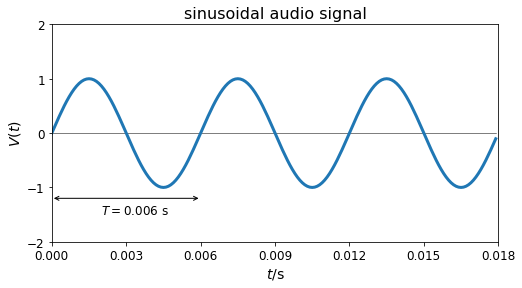

In [2]:
Image('https://raw.githubusercontent.com/elsentjhung/sound-wave-analyser/master/figures/sinusoidal-wave.png')

## Fourier series

In the plot above, the audio signal can be described by a single trigonometric function.
This is because we have assumed the sound wave to be sinusoidal.
However this is not true in general.
For example, the sound wave coming from a tuning fork is very close to a sinusoidal wave,
on the other hand, the sound wave coming from a saxophone is far from being sinusoidal.

Let us consider another audio signal from an unknown musical instrument, which is depicted in the figure below.
We can immediately tell that the signal is periodic with the same period $T=0.006\,\text{s}$ (or fundamental frequency $f\simeq167\,\text{Hz}$) as the one above.
However, the shape of the audio signal is much more complicated than a sinusoidal wave and cannot be simply described by a single trigonometric function.
Luckily, Fourier series allows us to decompose this periodic signal into a sum of trigonometric functions as follows:
\begin{equation}
V(t) = \sum_{p=0}^{\infty} A_p \cos(\omega_p t + \phi_p),\quad\text{where}\quad\omega_p=\frac{2\pi p}{T}\quad\text{and}\quad p=0,1,2,\dots.
\end{equation}
Each term in the Fourier series is a simple sinusoidal wave with angular frequency $\omega_p\in\mathbb{R}$, amplitude $A_p\in\mathbb{R}$, and phase difference $\phi_p\in\mathbb{R}$.
The first non-constant term in the Fourier series corresponds to the _fundamental frequency_
$\omega_1 = \frac{2\pi}{T}$ shown by the first figure in the second row below.
The next term in the Fourier series has double the fundamental frequency $\omega_2=\frac{4\pi}{T}$ 
and is sometimes called the second harmonic (see the second figure in the second row below). 
The next next term has triple the fundamental frequency $\omega_3=\frac{6\pi}{T}$ and is sometimes called the third harmonic (see the third figure in the second row below).
By writing:
\begin{equation}
A_p \cos(\omega_p t + \phi_p) = C_p e^{i\omega_p} + C_p^* e^{-i\omega_p},\quad\text{where}\quad C_p=\frac{A_p}{2}e^{i\phi_p},   
\end{equation}
we can write the Fourier series above in terms of the complex exponential:
\begin{equation}
V(t) = \sum_{p=-\infty}^{\infty} C_p e^{i\omega_p t},\quad\text{where}\quad\omega_p=\frac{2\pi p}{T}\quad\text{and}\quad p\in\mathbb{Z}.
\end{equation}
In the case of sound wave, $V(t)\in\mathbb{R}$ and the complex amplitude $C_p$ satisfies $C_p=C_{-p}^*$.
However the complex exponential form of the Fourier series above also works for the case of $V(t)\in\mathbb{C}$, and in this case, there is no restriction on $C_p$. 

To find the complex amplitudes $C_p$'s (or Fourier coefficients) we multiply the above equation by $e^{-i\omega_q t}$ and then integrate with respect to $t$ over one period from $t=-\frac{T}{2}$ to $t=\frac{T}{2}$.
\begin{equation}
\int_{-T/2}^{T/2} V(t) e^{-i\omega_q t}\,dt = \sum_{p=-\infty}^{\infty} C_p \int_{-T/2}^{T/2} e^{i(\omega_p - \omega_q) t}\,dt,
\end{equation}
where $p$ and $q$ are integers.
We note that the integral:
\begin{equation}
\int_{-T/2}^{T/2} e^{i(\omega_p - \omega_q) t}\,dt = \int_{-T/2}^{T/2} e^{i\frac{2\pi}{T}(p-q) t}\,dt =
\begin{cases}
T & \text{if } p = q \\
0 & \text{if } p \neq q
\end{cases}.
\end{equation}
More succintly, we can write,
\begin{equation}
\int_{-T/2}^{T/2} e^{i(\omega_p - \omega_q) t}\,dt = T \delta_{pq},
\end{equation}
where the Kronecker delta $\delta_{pq}$ is defined to be equal to $1$ if $p=q$ and $0$ if $p\neq q$.
Therefore,
\begin{align}
\int_{-T/2}^{T/2} V(t) e^{-i\omega_q t}\,dt &= \sum_{p=-\infty}^{\infty} C_p T \delta_{pq} = T C_q \\
\Rightarrow C_p &= \frac{1}{T} \int_{-T/2}^{T/2} V(t) e^{-i\omega_p t}\,dt.
\end{align}

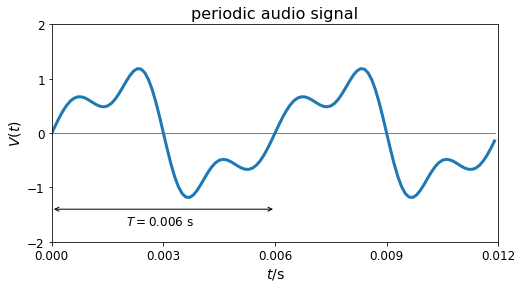

In [3]:
Image('https://raw.githubusercontent.com/elsentjhung/sound-wave-analyser/master/figures/wave.png')

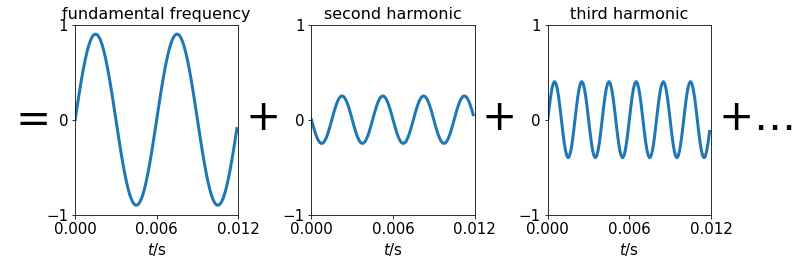

In [4]:
Image('https://raw.githubusercontent.com/elsentjhung/sound-wave-analyser/master/figures/decomposed-wave.png')

## Dirac delta function

Let us define the 'top hat' function of width $\epsilon$ and area $1$ to be:
\begin{equation}
T_\epsilon(x) =
\begin{cases}
\frac{1}{\epsilon} &\text{if } -\frac{\epsilon}{2} \le x \le \frac{\epsilon}{2} \\
0 &\text{otherwise}
\end{cases},
\end{equation}
where $x\in\mathbb{R}$.
Clearly, the integral of $T_\epsilon(x)$ over $x\in(-\infty,\infty)$ (or area under the curve) is equal to $1$, irrespective of $\epsilon$.
Now the Dirac delta function is defined to be the limit:
\begin{equation}
\delta(x) = \lim_{\epsilon\rightarrow0} T_\epsilon(x).
\end{equation}
Pictorially, we can imagine the width of the top hat function becoming narrower and narrower and the height becoming higher and higher (while maintaining the area under the curve to be $1$), as we can see in the figure below.
In this limit, the Dirac delta function $\delta(x-y)$ has zero value everywhere except at $x=y$:
\begin{equation}
\delta(x - y) = 
\begin{cases}
0 &\text{if } x\neq y \\
\infty &\text{if } x = y
\end{cases},
\end{equation}
where $x,y\in\mathbb{R}$.
The Dirac delta function will be useful later in Fourier transform due to the following properties:
\begin{align}
\int_{-\infty}^\infty \delta(x - y)\,dx &= 1 \\
\int_{-\infty}^\infty \delta(x - y)f(x)\,dx &= f(y).
\end{align}
The first property follows directly from the definition of the Dirac delta function as a limit of the top hat function.

__Exercise 2.__
From the definition $\delta(x)=\lim_{\epsilon\rightarrow0}R_\epsilon(x)$, prove the second property of the Dirac delta function above. 

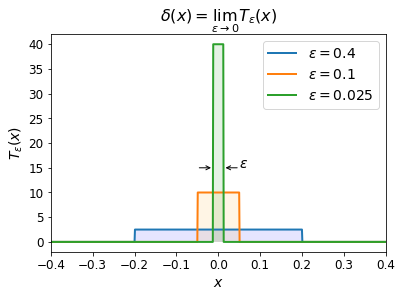

In [5]:
Image('https://raw.githubusercontent.com/elsentjhung/sound-wave-analyser/master/figures/Dirac-delta.png')

## Fourier transform

In reality, the audio signal is not perfectly periodic since it might be contaminated by a background noise. 
Furthermore the oscillation of the sound wave itself decays gradually to zero, 
so a realistic representation of an audio signal recorded from a microphone might look something like the plot below.

To analyse this audio signal, we shall use Fourier transform, which is an extension of the Fourier series above by taking the limit $T\rightarrow\infty$ (loosely speaking, the function $V(t)$ is no longer periodic).
First let us recall the definition of the Fourier series:
\begin{align}
V(t) &= \sum_{p=-\infty}^{\infty} \tilde{V}(\omega_p) e^{i\omega_p t} \quad\text{(Fourier series)} \\
\tilde{V}(\omega_p) &= \frac{1}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} dt \, V(t) e^{-i\omega_p t}. \quad\text{(Fourier series coefficients)}.
\end{align}
Note that we have relabelled $C_p\rightarrow\tilde{V}(\omega_p)$ from the definitions given in the previous section.
The angular frequency $\omega_p$ is an integer multiple of $\frac{2\pi}{T}$, _i.e._
\begin{equation}
\omega_p = \frac{2\pi p}{T},\quad\text{where}\quad p=0,\pm 1,\pm 2,\dots.
\end{equation}
Now let us consider the first equation from the Fourier series above, which we can write as
\begin{align}
V(t) = \sum_{p=-\infty}^{\infty}\Delta p \, \tilde{V}(\omega_p) e^{i\omega_p t},
\end{align}
since $\Delta p = (p+1) - p = 1$.
Now from the definition of the angular frequency, we have $\Delta\omega_p=\frac{2\pi}{T}\Delta p$, and thus
\begin{align}
V(t) = \frac{T}{2\pi}\sum_{p=-\infty}^{\infty}\Delta\omega_p \, \tilde{V}(\omega_p) e^{i\omega_p t}.
\end{align}
Substituting the second equation from the Fourier series for $\tilde{V}(\omega_p)$, we get:
\begin{align}
V(t) &= \frac{T}{2\pi}\sum_{p=-\infty}^{\infty}\Delta\omega_p \,  
\left[\frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}} dt' \, V(t') e^{-i\omega_p t'}\right] e^{i\omega_p t} \\
&= \frac{1}{2\pi}\sum_{p=-\infty}^{\infty}\Delta\omega_p \,  
\left[ \int_{-\frac{T}{2}}^{\frac{T}{2}} dt' \, V(t') e^{i\omega_p(t-t')} \right].
\end{align}
Finally we can take the limit $T\rightarrow\infty$.
In this case $\omega_p$ becomes continuous $\omega_p\rightarrow\omega\in\mathbb{R}$ and the summation over $\omega_p$ becomes an integral over $\omega$:
\begin{align}
V(t) &= \frac{1}{2\pi}\int_{-\infty}^{\infty} d\omega \,  
\left[\int_{-\infty}^{\infty} dt' \, V(t') e^{i\omega(t-t')} \right] \\
&= \int_{-\infty}^{\infty} dt' \, V(t') 
\left[\frac{1}{2\pi}\int_{-\infty}^{\infty} d\omega \, e^{i\omega(t-t')} \right].
\end{align}
Note that we have swapped the order of integration in the last line.
The right hand side has to be equal to $V(t)$, which implies the term inside the square bracket in the last line above must be the Dirac delta function:
\begin{equation}
\delta(t-t') = \frac{1}{2\pi}\int_{-\infty}^{\infty} d\omega \, e^{i\omega(t-t')}.
\end{equation}
The above equation is also called the completeness relation.
Similarly, by relabelling the integration variables, we can also write the Dirac delta function as:
\begin{equation}
\delta(\omega-\omega') = \frac{1}{2\pi}\int_{-\infty}^{\infty} dt \, e^{i(\omega-\omega')t}.
\end{equation} 
The above equation is also called the orthogonality relation.

Now we can define the Fourier transform to be a transformation from one function $V(t)$ to another function $\tilde{V}(\omega)$:
\begin{align}
V(t):\mathbb{R}\rightarrow\mathbb{C} 
\begin{matrix}
\overset{\text{Fourier transform}}{\longrightarrow} \\
\underset{\text{inverse Fourier transform}}{\longleftarrow}
\end{matrix}
\tilde{V}(\omega):\mathbb{R}\rightarrow\mathbb{C},
\end{align}
through the following formula:
\begin{align}
V(t) &= \int_{-\infty}^\infty \tilde{V}(\omega) e^{i\omega t} d\omega 
\quad\text{(inverse Fourier transform)}\\
\tilde{V}(\omega) &= \frac{1}{2\pi}\int_{-\infty}^\infty V(t) e^{-i\omega t} dt
\quad\text{(Fourier transform).}
\end{align}
Note that the independent variables $t$ and $\omega$ are real, but the dependent variables $V$ and $\tilde{V}$ are complex in general.
In our case, $V(t)$ represents the audio signal and hence $V$ happens to be real.

__Exercise 3.__
Show that if $V(t)$ is real then $\tilde{V}(-\omega)=\tilde{V}(\omega)^*$ for all $\omega\in\mathbb{R}$ and _vice versa_.

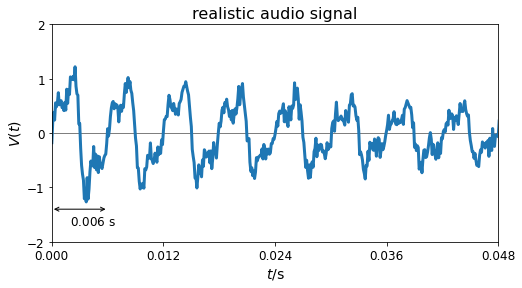

In [9]:
Image('https://raw.githubusercontent.com/elsentjhung/sound-wave-analyser/master/figures/noisy-signal.png')

## Energy spectrum

From electromagnetism, we learnt that the rate of power dissipation is given by:
\begin{equation}
P(t) = \frac{V(t)^2}{R},\quad\text{where $R$ is the electrical resistance.}
\end{equation}
Since power is energy per unit time, the total energy dissipation is then given by the time integral
\begin{equation}
E = \frac{1}{R}\int_{-\infty}^\infty V(t)^2\,dt.
\end{equation}
Substituting the definition for Fourier transform to the above, we get:
\begin{align}
E &= \frac{1}{R} \int dt \int d\omega \int d\omega' \, \tilde{V}(\omega)\tilde{V}(\omega') e^{i (\omega + \omega') t} \\
&= \frac{1}{R} \int d\omega \int d\omega' \, \tilde{V}(\omega)\tilde{V}(\omega') \underbrace{\int dt\,e^{i (\omega + \omega') t}}_{2\pi\delta(\omega+\omega')}  \\
\end{align}
We perform the integration over $t$ first and this gives a Dirac delta function through the orthogonality relation.
Thus we get:
\begin{align}
E &= \frac{2\pi}{R} \int d\omega \int d\omega' \, \tilde{V}(\omega)\tilde{V}(\omega') \delta(\omega + \omega') \\
&= \frac{2\pi}{R} \int d\omega \, \tilde{V}(\omega) \tilde{V}(-\omega),
\end{align}
where we have used the second property of the Dirac delta function in the last equation.|

Since $V(t)$ is real, we have $\tilde{V}(-\omega)=\tilde{V}(\omega)^*$ from the previous exercise
and thus the total energy dissipation can be written as:
\begin{equation}
E = \frac{2\pi}{R} \int_{-\infty}^\infty d\omega \, |\tilde{V}(\omega)|^2 
\end{equation}
Now we can define the energy spectrum to be $\tilde{E}(\omega)=|\tilde{V}(\omega)|^2$.
Physically, Fourier transform allows us to decompose an electrical signal into an infinite sum of sinusoidal oscillations with different angular frequencies $\omega$'s.
The energy spectrum $\tilde{E}(\omega)$ gives the energy contribution from a single oscillation with corresponding angular frequency $\omega$.

The figure below shows the energy spectrum $\tilde{E}(f)$ as a function of frequency $f$, which corresponds to the realistic audio signal $V(t)$, shown in the previous figure.
Note that the frequency $f$ is related to the angular frequency by a factor of $2\pi$, _i.e._ $\omega=2\pi f$.
As we can see in the figure below, the energy spectrum spectrum is symmetric with respect to $f\rightarrow-f$
(and for this reason, $\tilde{E}(f)$ is usually plotted on the positive $x$-axis only).
Furthermore we also observe several sharp peaks in the energy spectrum.
The first peak $f\simeq167\,\text{Hz}$ corresponds to the fundamental frequency of the signal.
(Although the signal is no longer periodic, it still retains some underlying periodic characteristics.)
The second peak $f\simeq333\,\text{Hz}$ (which is double the fundamental frequency) corresponds to the second harmonic and so on.
If the signal $V(t)$ had been purely periodic, then the energy spectrum $\tilde{E}(f)$ would have been strictly zero everywhere except at $f=$ multiple integers of the fundamental frequency.

__Exercise 4.__
Show that the energy spectrum is symmetric, _i.e._ $\tilde{E}(\omega)=\tilde{E}(-\omega)$. 

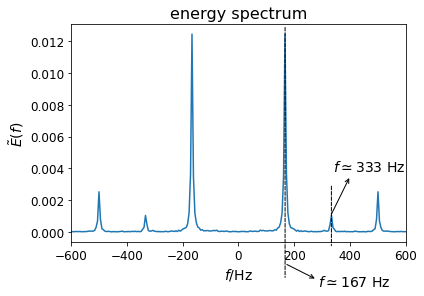

In [6]:
Image('https://raw.githubusercontent.com/elsentjhung/sound-wave-analyser/master/figures/spectrum.png')

## Storing audio wave into a computer

Let's say we record a sound on our microphone for the total duration of $t_N$ (also called the sampling time). 
How is this audio signal $V(t)$ stored inside our computer?
Obviously a computer cannot store an infinite amount of information, so the computer has to divide the signal $V(t)$ into discrete values $V(t_0),V(t_1),V(t_2),\dots,V(t_{N-1})$ at discrete times $t_n$'s, as we can see in the figure below.
This also means that the time is discretized into:
$t\rightarrow t_n=n\Delta t$, where $n=0,1,2,\dots,N-1$ and $\Delta t$ is the timestep.
In the figure below, the total time (or sampling time) is $t_N=0.018\,\text{s}$, the timestep is $\Delta t = 0.001\,\text{s}$, and the total number of points is $N=18$.
We also define the framerate to be the total number of points per unit time.
In the figure below, we can calculate the framerate to be:
\begin{equation}
\text{framerate} = \frac{N}{t_N} = \frac{18}{0.018\,\text{s}} = 1000\,\text{s}^{-1}.
\end{equation}
Usually, when we record a sound using recording software such as Audacity, we need to specify this framerate.
Higher framerate will give a better sound quality but the file size will also be bigger!
For a 16-bit digital audio, the values of $V$ ranges from $-32768$ to $32767$ in integer steps (note that $V(t)$ is in some rescaled units).
Therefore the vertical $V$-axis is also discrete. 

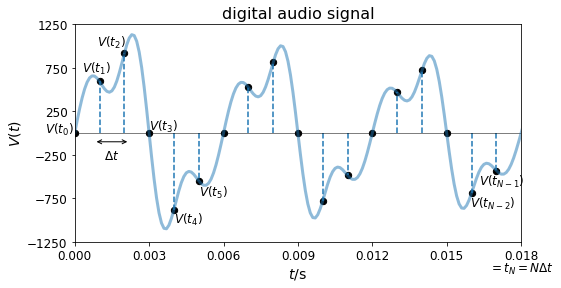

In [11]:
Image('https://raw.githubusercontent.com/elsentjhung/sound-wave-analyser/master/figures/digital-signal.png')

## Discrete Fourier transform

Now how do we perform a Fourier transform operation on the $N$ data points $V(t_0),V(t_1),\dots,V(t_{N-1})$ shown above?
First let us order these $N$ data points as a column vector: $(V(t_0),V(t_1),\dots,V(t_{N-1}))^T$.
The first element in the column vector corresponds to the value of $V$ at time $t_0$, the second element in the column vector corresponds to the value of $V$ at time $t_1$, and so on.
The discrete Fourier transform of $N$ data points $(V(t_0),V(t_1),\dots,V(t_{N-1}))^T$ in time-space is defined to be an ordered set of $N$ points $(\tilde{V}(\omega_0),\tilde{V}(\omega_1),\dots,\tilde{V}(\omega_{N-1}))^T$ in the frequency-space:
\begin{equation}
\begin{pmatrix}
V(t_0) \\
V(t_1) \\
\vdots \\
V(t_{N-1})
\end{pmatrix}
\begin{matrix}
\overset{\text{discrete Fourier transform}}{\longrightarrow} \\
\underset{\text{inverse discrete Fourier transform}}{\longleftarrow}
\end{matrix}
\begin{pmatrix}
\tilde{V}(\omega_0) \\
\tilde{V}(\omega_1) \\
\vdots \\
\tilde{V}(\omega_{N-1})
\end{pmatrix}
\end{equation}
The first element in the column vector on the right hand side above corresponds to the value of $\tilde{V}$ at angular frequency $\omega_0$, the second element corresponds to the value of $\tilde{V}$ at angular frequency $\omega_1$ and so on.
Here both times $t_n$'s and angular frequencies $\omega_p$'s are discrete and finite:
\begin{align}
t_n &= n\Delta t \quad \text{where } n=0,1,2,\dots,N-1 \\
\omega_p &= \frac{2\pi p}{t_N} \quad \text{where } p=0,1,2,\dots,N-1.
\end{align}
Note that $t_N=N\Delta t$ is the total duration of the audio signal.
$(V(t_0),V(t_1),\dots,V(t_{N-1}))^T$ and $(\tilde{V}(\omega_0),\tilde{V}(\omega_1),\dots,\tilde{V}(\omega_{N-1}))^T$ are defined through the following relations:
\begin{align}
V(t_n) &= \sum_{p=0}^{N-1} \tilde{V}(\omega_p)e^{i\omega_p t_n} \quad \text{(inverse discrete Fourier transform)} \\
\tilde{V}(\omega_p) &= \frac{1}{N}\sum_{n=0}^{N-1} V(t_n)e^{-i\omega_p t_n} \quad \text{(discrete Fourier transform)}
\end{align}
Now we will show that the definition of the discrete Fourier transform above makes sense.
Let us substitute the second equation in the definition into the first equation to get:
\begin{align}
V(t_n) &= \frac{1}{N}\sum_{p=0}^{N-1}\sum_{m=0}^{N-1} V(t_m)e^{i\omega_p (t_n - t_m)} \\
&= \frac{1}{N}\sum_{m=0}^{N-1} V(t_m) \left[ \sum_{p=0}^{N-1} e^{i\frac{2\pi}{N} (n - m)p} \right]  
\end{align}
The summation over $p$ inside the square brackets is a geometric sum, so we can use the formula:
\begin{align}
\sum_{p=0}^{N-1} r^p =
\begin{cases}
\frac{1-r^N}{1-r} & \text{if } r\neq1 \\
N & \text{if } r=1
\end{cases}.
\end{align}
So the term inside the square brackets becomes:
\begin{align}
\sum_{p=0}^{N-1} e^{i\frac{2\pi}{N} (n - m)p} &=
\begin{cases}
\frac{1-e^{i 2\pi (n - m)}}{1-e^{i\frac{2\pi}{N} (n - m)}} & \text{if } n\neq m \\
N & \text{if } n=m
\end{cases}  \\
&=
\begin{cases}
0 & \text{if } n\neq m \\
N & \text{if } n=m
\end{cases} \\
&= N \delta_{nm}.
\end{align}
Hence the right hand side in the equation above becomes
\begin{align}
\frac{1}{N}\sum_{m=0}^{N-1} V(t_m) \left[ \sum_{p=0}^{N-1} e^{i\frac{2\pi}{N} (n - m)p} \right] 
= \sum_{m=0}^{N-1} V(t_m) \delta_{nm}
= V(t_n),
\end{align}
which verifies our definition of discrete Fourier transform and its inverse.

__Exercise 5.__
Show that $\tilde{V}(\omega_p)$ is periodic with period $\frac{2\pi}{\Delta t}$, _i.e._,
$\tilde{V}(\omega_p)=\tilde{V}\left(\omega_p+\frac{2\pi}{\Delta t}\right)$.

Since $\tilde{V}(\omega_p)$ is periodic with period $\frac{2\pi}{\Delta t}$, 
we can make the summation inside the discrete Fourier transform a little bit more symmetric:
\begin{align}
V(t_n) &= \sum_{p=-N/2}^{N/2-1} \tilde{V}(\omega_p)e^{i\omega_p t_n} \quad \text{(inverse discrete Fourier transform)} \\
\tilde{V}(\omega_p) &= \frac{1}{N}\sum_{n=0}^{N-1} V(t_n)e^{-i\omega_p t_n} \quad \text{(discrete Fourier transform)},
\end{align}
where the range of the angular frequency $\omega_p$ is shifted to:
\begin{equation}
\omega_p = \frac{2\pi p}{t_N} \quad \text{where } 
p=-\frac{N}{2},-\frac{N}{2}+1,-\frac{N}{2}+2\dots,-2,-1,0,1,2,\dots,\frac{N}{2}-2,\frac{N}{2}-1.
\end{equation}
Now we will discover how the Fourier series, introduced in the beginning of this tutorial, can be derived from discrete Fourier transform.
First we write the discrete Fourier transform as follows:
\begin{align}
\tilde{V}(\omega_p) &= \frac{1}{N\Delta t}\sum_{n=0}^{N-1}\Delta t \, V(t_n)e^{-i\omega_p t_n} \\
&= \frac{1}{t_N}\sum_{n=0}^{N-1}\Delta t \, V(t_n)e^{-i\omega_p t_n}
\end{align}
Next we take the limit $\Delta t\rightarrow 0$ and $N\rightarrow\infty$ and the summation over $t_n$ above becomes an integral over $t$:
\begin{align}
\tilde{V}(\omega_p) = \frac{1}{t_N}\int_0^{t_N} dt \, V(t)e^{-i\omega_p t},
\end{align}
and correspondingly, the inverse discrete Fourier transform becomes:
\begin{equation}
V(t_n) = \sum_{p=-\infty}^{\infty} \tilde{V}(\omega_p)e^{i\omega_p t},
\end{equation}
and thus we recover the Fourier series when we take the limit the time $t_n$ becomes continuous $t_n\rightarrow t\in\mathbb{R}$. 

Finally, we can also write the discrete Fourier transfrom in the matrix form as follows:
\begin{equation}
\begin{pmatrix}
\tilde{V}(\omega_0) \\
\tilde{V}(\omega_1) \\
\tilde{V}(\omega_2) \\
\vdots \\
\tilde{V}(\omega_{N-1})
\end{pmatrix}
= \frac{1}{N}
\begin{pmatrix}
1 & 1 & 1 & \cdots & 1\\
1 & e^{-i\frac{2\pi}{N}} & e^{-i\frac{2\pi}{N}2} & & \\
1 & e^{-i\frac{2\pi}{N}2} & e^{-i\frac{2\pi}{N}4} & & \\
\vdots & &  & \ddots & \\ 
1 &  &  &  & e^{-i\frac{2\pi}{N}(N-1)^2}
\end{pmatrix}
\begin{pmatrix}
V(t_0) \\
V(t_1) \\
V(t_2) \\
\vdots \\
V(t_{N-1})
\end{pmatrix}
\end{equation}
As we can see from above, if we have $N$ data points, we need to perform an $N\times N$ matrix multiplication.
This means the number of multiplications (with the complex numbers $e^{-i\frac{2\pi}{N}},e^{-i\frac{4\pi}{N}},e^{-i\frac{6\pi}{N}}$ _etc_.) scales as $N^2$.
However there is an efficient algorithm, called fast Fourier transform, which brings this scaling down to $N\log N$.

__Exercise 6.__
Show that for $N=4$, the matrix form of the discrete Fourier transform can be written as follows:
\begin{equation}
\begin{pmatrix}
\tilde{V}(\omega_0) \\
\tilde{V}(\omega_1) \\
\tilde{V}(\omega_2) \\
\tilde{V}(\omega_3)
\end{pmatrix}
= \frac{1}{4}
\begin{pmatrix}
1 & 1 & 1 & 1 \\
1 & -i & -1 & i \\
1 & -1 & 1 & -1 \\
1 & i & -1 & -i
\end{pmatrix}
\begin{pmatrix}
V(t_0) \\
V(t_1) \\
V(t_2) \\
V(t_3)
\end{pmatrix}
\end{equation}


## Fast Fourier transform

Let us relabel $V(t_n)\rightarrow V_n$ and $\tilde{V}(\omega_p)\rightarrow\tilde{V}_p$, where $n=0,1,2,\dots,N-1$
and $p=-\frac{N}{2},-\frac{N}{2}+1,\dots,-1,0,1,\dots,\frac{N}{2}-1$.
The discrete Fourier transform becomes:
\begin{align}
V_n &= \sum_{p=-N/2}^{N/2} \tilde{V}_p \, e^{i\frac{2\pi}{N}pn} \quad \text{(inverse discrete Fourier transform)} \\
\tilde{V}_p &= \frac{1}{N}\sum_{n=0}^{N-1} V_n \, e^{-i\frac{2\pi}{N}pn} \quad \text{(discrete Fourier transform)},
\end{align}
Written in this way, the discrete Fourier transform (DFT) does not depend on the time discretization parameter $\Delta t$ anymore.
This is actually the form of DFT which is used in NumPy.
We only need $\Delta t$ when we are plotting $V(t)$ as a function of time $t$ or plotting $\tilde{V}(\omega)$ as a function of $\omega$.
As we recall from the previous section, the computation of DFT directly will involve an $N\times N$ matrix multiplication and scales as $N^2$.
However, there is a trick which reduce the number of complex number multiplications.
First let us assume that $N$ can be written in powers of $2$, so that $N=2^s$ for some positive integer $s$, and we define the DFT without the normalization prefactor:
\begin{equation}
\tilde{V}_p = \sum_{n=0}^{N-1} V_n \, e^{-i\frac{2\pi}{N}pn} \quad \text{(DFT without normalization)}.
\end{equation}
(We can add the normalization prefactor $1/N$ at the end of the computation.)
Now we split the summation over $n$ in the DFT into even and odd terms, _i.e._,
\begin{align}
\tilde{V}_p &= \sum_{\text{even }n} V_n \, e^{-i\frac{2\pi}{N}pn} 
\ + \sum_{\text{odd }n} V_n \, e^{-i\frac{2\pi}{N}pn} \\
&= \sum_{n=0}^{N/2-1} V_{2n} \, e^{-i\frac{2\pi}{N}p(2n)} 
\ + \sum_{n=0}^{N/2-1} V_{2n+1} \, e^{-i\frac{2\pi}{N}p(2n+1)} \\
&= \underbrace{\sum_{n=0}^{N/2-1} V_{2n} \, e^{-i\frac{4\pi}{N}pn}}_{\tilde{E}_p} 
\ + e^{-i\frac{2\pi}{N}p} \underbrace{\sum_{n=0}^{N/2-1} V_{2n+1} \, e^{-i\frac{4\pi}{N}pn}}_{\tilde{O}_p}.
\end{align}
We have labelled the two sums as $\tilde{E}_p$ and $\tilde{O}_p$ respectively.
We recognize that term $\tilde{E}_p$ is actually a DFT over $N/2$ even data points:
\begin{equation}
\begin{pmatrix}
V_0 \\
V_2 \\
V_4 \\
\vdots \\
V_{N-2}
\end{pmatrix}
\overset{\text{DFT}}{\longrightarrow} 
\begin{pmatrix}
\tilde{E}_1 \\
\tilde{E}_2 \\
\tilde{E}_3 \\
\vdots \\
\tilde{E}_{N/2-1}
\end{pmatrix}.
\end{equation}
Similarly, $\tilde{O}_p$ is a DFT over $N/2$ odd data points:
\begin{equation}
\begin{pmatrix}
V_1 \\
V_3 \\
V_5 \\
\vdots \\
V_{N-1}
\end{pmatrix}
\overset{\text{DFT}}{\longrightarrow} 
\begin{pmatrix}
\tilde{O}_1 \\
\tilde{O}_2 \\
\tilde{O}_3 \\
\vdots \\
\tilde{O}_{N/2-1}
\end{pmatrix}.
\end{equation}
You might have noticed above that $\tilde{E}_p$ and $\tilde{O}_p$ are defined over $p=0,1,2,\dots,\frac{N}{2}-1$, whereas $\tilde{V}_p$ is defined over $p=0,1,2,\dots,N-1$.
However this should not cause any problem since $\tilde{E}_p$ and $\tilde{O}_p$ are periodic with period $N/2$ so that 
$\tilde{E}_{p+N/2}=\tilde{E}_p$ and $\tilde{O}_{p+N/2}=\tilde{O}_p$.
Therefore, we obtain the following recursion relation (Danielson–Lanczos lemma):
\begin{align}
\left.
\begin{array}{r}
\tilde{V}_p = \tilde{E}_p + e^{-i\frac{2\pi}{N}p}\tilde{O}_p \\
\tilde{V}_{p+N/2} = \tilde{E}_{p} - e^{-i\frac{2\pi}{N}p}\tilde{O}_{p}
\end{array}
\right\} \text{ for } p=0,1,2,\dots,\frac{N}{2}-1,
\end{align}
which relates $N$-point DFT recursively in terms of two $N/2$-point DFTs (one for the odd and one for the even terms).
In other words, we have reduced the $N\times N$ matrix multiplication into two $\frac{N}{2}\times\frac{N}{2}$ matrix multiplications .
We can further split $\tilde{E}_p$ and $\tilde{O}_p$ into odd and even terms so the equation above becomes:
\begin{align}
\tilde{V}_p &= 
\underbrace{
    \sum_{\text{even }n} V_{2n} \,  e^{-i\frac{4\pi}{N}pn} 
\ + \sum_{\text{odd }n} V_{2n} \, e^{-i\frac{4\pi}{N}pn}
}_{\tilde{E}_p}
\ + e^{-i\frac{2\pi}{N}p} 
\Bigg( \underbrace{
    \sum_{\text{even }n} V_{2n+1} \, e^{-i\frac{4\pi}{N}pn} 
\ + \sum_{\text{odd }n} V_{2n+1} \, e^{-i\frac{4\pi}{N}pn} }_{\tilde{O}_p}
\Bigg) \\
&= 
    \underbrace{\sum_{n=0}^{N/4-1} V_{4n} \,  e^{-i\frac{8\pi}{N}pn}}_{\tilde{A}_p}
\ + e^{-i\frac{4\pi}{N}p} \underbrace{\sum_{n=0}^{N/4-1} V_{4n+2} \, e^{-i\frac{8\pi}{N}pn}}_{\tilde{B}_p}
\ + e^{-i\frac{2\pi}{N}p} 
\Bigg( 
    \underbrace{\sum_{n=0}^{N/4-1} V_{4n+1} \, e^{-i\frac{8\pi}{N}pn}}_{\tilde{C}_p}
\ + e^{-i\frac{4\pi}{N}p} \underbrace{\sum_{n=0}^{N/4-1} V_{4n+3} \, e^{-i\frac{8\pi}{N}pn}}_{\tilde{D}_p}
\Bigg)
\end{align}
We have labelled the four sums as $\tilde{A}_p$, $\tilde{B}_p$, $\tilde{C}_p$, and $\tilde{D}_p$ respectively.
We recognize that $\tilde{A}_p$, $\tilde{B}_p$, $\tilde{C}_p$, and $\tilde{D}_p$ are each a DFT of $N/4$ data points:
\begin{align}
\begin{pmatrix}
V_0 \\
V_4 \\
V_8 \\
\vdots \\
V_{N-4}
\end{pmatrix}
\overset{\text{DFT}}{\longrightarrow} 
\begin{pmatrix}
\tilde{A}_1 \\
\tilde{A}_2 \\
\tilde{A}_3 \\
\vdots \\
\tilde{A}_{N/4-1}
\end{pmatrix}
&\quad\text{,}\quad
\begin{pmatrix}
V_2 \\
V_6 \\
V_{10} \\
\vdots \\
V_{N-2}
\end{pmatrix}
\overset{\text{DFT}}{\longrightarrow} 
\begin{pmatrix}
\tilde{B}_1 \\
\tilde{B}_2 \\
\tilde{B}_3 \\
\vdots \\
\tilde{B}_{N/4-1}
\end{pmatrix} \\
\begin{pmatrix}
V_1 \\
V_5 \\
V_9 \\
\vdots \\
V_{N-3}
\end{pmatrix}
\overset{\text{DFT}}{\longrightarrow} 
\begin{pmatrix}
\tilde{C}_1 \\
\tilde{C}_2 \\
\tilde{C}_3 \\
\vdots \\
\tilde{C}_{N/4-1}
\end{pmatrix}
&\quad\text{,}\quad
\begin{pmatrix}
V_3 \\
V_7 \\
V_{11} \\
\vdots \\
V_{N-1}
\end{pmatrix}
\overset{\text{DFT}}{\longrightarrow} 
\begin{pmatrix}
\tilde{D}_1 \\
\tilde{D}_2 \\
\tilde{D}_3 \\
\vdots \\
\tilde{D}_{N/4-1}
\end{pmatrix}
\end{align}
$\tilde{A}_p$, $\tilde{B}_p$, $\tilde{C}_p$, and $\tilde{D}_p$ are periodic with period $N/4$.
So to obtain $\tilde{E}_p$ and $\tilde{O}_p$ from $\tilde{A}_p$, $\tilde{B}_p$, $\tilde{C}_p$, and $\tilde{D}_p$, 
we use the recursion formula (Danielson-Lanczos):
\begin{align}
\left.
\begin{array}{r}
\tilde{E}_p = \tilde{A}_p + e^{-i\frac{4\pi}{N}p}\tilde{B}_p \\
\tilde{E}_{p+N/4} = \tilde{A}_p - e^{-i\frac{4\pi}{N}p}\tilde{B}_p  \\
\tilde{O}_{p} = \tilde{C}_p + e^{-i\frac{4\pi}{N}p}\tilde{D}_p \\
\tilde{O}_{p+N/4} = \tilde{C}_p - e^{-i\frac{4\pi}{N}p}\tilde{D}_p
\end{array} \right\} \text{ for } p=0,1,2,\dots,\frac{N}{4}-1.
\end{align}
Next, we use the recursion formula again to find $\tilde{V}_p$ from $\tilde{E}_p$ and $\tilde{O}_p$.
So instead of dealing with $N\times N$ matrix multiplication, we can now just deal with $\frac{N}{4}\times\frac{N}{4}$ matrix multiplications and then use the recursion formula twice to find $\tilde{V}_p$.
So why stop here? 
We can further split $\tilde{A}_p$, $\tilde{B}_p$, $\tilde{C}_p$, and $\tilde{D}_p$ into even and odd terms and do this recursively until we get $2\times 2$ DFT matrices.
This algorithm is called fast Fourier transform (FFT).
Computation of FFT scales as $N\log N$, in contrast to standard DFT, which scales as $N^2$.
Although the original FFT paper requires the number of data points $N$ to be powers of $2$, modern FFT algorithms usually do not require this condition anymore.

Below shows the illustration of the FFT algorithm for the case of $N=8$.
First we shuffle the ordered dataset $(V_0,V_1,\dots,V_7)^T$, separating the even and the odd terms into upper and lower half of the column vector.
And then we shuffle again for the even and odd terms inside the upper and lower half of the column vector.
Next we split the column vector into $2$-point column vectors: $(V_0,V_4)^T$, $(V_2,V_6)^T$, $(V_1,V_5)^T$, and $(V_3,V_7)^T$.
Then we perform $2$-point DFT on each $2$-point column vectors to get $\tilde{A}_p$, $\tilde{B}_p$, $\tilde{C}_p$, and $\tilde{D}_p$.
Then using the recursion formula above (Danielson-Lanczos), we get $4$-point DFTs, $\tilde{E}_p$ and $\tilde{O}_p$, from $2$-point DFTs, $\tilde{A}_p$, $\tilde{B}_p$, $\tilde{C}_p$, and $\tilde{D}_p$.
Finally, we apply the recursion relation again to find the $8$-point DFT, $\tilde{V}_p$, from $\tilde{E}_p$ and $\tilde{O}_p$.

\begin{align}
\left(\begin{array}{c}
V_{0}\\
V_{1}\\
V_{2}\\
V_{3}\\
V_{4}\\
V_{5}\\
V_{6}\\
V_{7}
\end{array}\right)
\overset{\text{shuffle}}{\longrightarrow}
\left(\begin{array}{c}
V_{0}\\
V_{2}\\
V_{4}\\
V_{6}\\
V_{1}\\
V_{3}\\
V_{5}\\
V_{7}
\end{array}\right)
\overset{\text{shuffle}}{\longrightarrow}
\left(\begin{array}{c}
V_{0}\\
V_{4}\\
V_{2}\\
V_{6}\\
V_{1}\\
V_{5}\\
V_{3}\\
V_{7}
\end{array}\right)\overset{\text{split}}{\longrightarrow}\begin{array}{c}
\begin{array}{c}
\left(\begin{array}{c}
V_{0}\\
V_{4}
\end{array}\right)\overset{\text{DFT}}{\longrightarrow}\left(\begin{array}{c}
\tilde{A}_{0}\\
\tilde{A}_{1}
\end{array}\right)\\
\left(\begin{array}{c}
V_{2}\\
V_{6}
\end{array}\right)\overset{\text{DFT}}{\longrightarrow}\left(\begin{array}{c}
\tilde{B}_{0}\\
\tilde{B}_{1}
\end{array}\right)
\end{array}\stackrel{\text{recursion formula}}{\longrightarrow}\left(\begin{array}{c}
\tilde{E}_{0}\\
\tilde{E}_{1}\\
\tilde{E}_{2}\\
\tilde{E}_{3}
\end{array}\right)\\
\begin{array}{c}
\left(\begin{array}{c}
V_{1}\\
V_{5}
\end{array}\right)\overset{\text{DFT}}{\longrightarrow}\left(\begin{array}{c}
\tilde{C}_{0}\\
\tilde{C}_{1}
\end{array}\right)\\
\left(\begin{array}{c}
V_{3}\\
V_{7}
\end{array}\right)\overset{\text{DFT}}{\longrightarrow}\left(\begin{array}{c}
\tilde{D}_{0}\\
\tilde{D}_{1}
\end{array}\right)
\end{array}\stackrel{\text{recursion formula}}{\longrightarrow}\left(\begin{array}{c}
\tilde{O}_{0}\\
\tilde{O}_{1}\\
\tilde{O}_{2}\\
\tilde{O}_{3}
\end{array}\right)
\end{array}\stackrel{\text{recursion formula}}{\longrightarrow}\left(\begin{array}{c}
\tilde{V}_{0}\\
\tilde{V}_{1}\\
\tilde{V}_{2}\\
\tilde{V}_{3}\\
\tilde{V}_{4}\\
\tilde{V}_{5}\\
\tilde{V}_{6}\\
\tilde{V}_{7}
\end{array}\right)
\end{align}



__Exercise 7.__
Show that the number of complex number multiplications in fast Fourier transform algorithm scales as $N\log N$.

## Importing  `.wav` file into a NumPy array

There are different audio formats in computer such as `.mp3` and `.wav`.
The difference is that the former is a compressed file while the later is an uncompressed file.
In this Tutorial, we will only consider `.wav` files. 

Let us now put everything we have learnt above into practice. 
Inside the folder `./samples/` we have various `.wav` files from different notes from different musical instruments.
First let us have a look at the file called `./samples/piano-C4.wav`. 
This is a recording of the note C4 in a piano.
This note has a fundamental frequency of $261.63\,\text{Hz}$.
Let us now analyse this wave file below.
First we need to import the essential libraries such as `numpy`, `matplotlib.pyplot`, `sys` and `scipy.io.wavfile` into Python, 
as you can see in the first few lines of the code below.
The library `sys` is used to access the filesystem inside our computer and the library `scipy.io.wavfile` is used to import and export `.wav` files.
Next we will open the file `./samples/piano-C4.wav` and save it into a NumPy array, called `V`,
using the method `wavefile.read('./samples/piano-C4.wav')`.
This method also reads the framerate of the `.wav` file which we save into the variable called `framerate`.
In this example, the framerate is $11025\,\text{s}^{-1}$, which we can confirm by printing the value into the screen.
We also need the total number of points, _i.e._ $N$, which we can obtain by finding the length of the array `V` using the method `len(V)`.
In this we get $N=29750$.
Hence we can calculate the total recording time (or sampling time) $t_N$:
\begin{equation}
t_N = \frac{N}{\text{framerate}} \simeq 2.70\,\text{s}.
\end{equation}
We also need to compute the timestep $\Delta t$:
\begin{equation}
\Delta t = \frac{t_N}{N} = \frac{1}{\text{framerate}} \simeq 0.0000907\,\text{s}.
\end{equation}
At this point, the NumPy array `V` should contain the audio signals $V(t_0),V(t_1),\dots V(t_{N-1})$ as its elements:
\begin{equation}
\text{NumPy array V} =
\underbrace{
\begin{array}{|c|c|c|c|c|}
\hline
V(t_0) & V(t_1) & V(t_2) & \dots & V(t_{N-1}) \\
\hline
\end{array}}_{\text{length}=N}
\end{equation}

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.io import wavfile

# read a .wav file and store it into a numpy array
framerate, V = wavfile.read('./samples/piano-C4.wav')

print(f'framerate = {framerate} s^-1')  # print the framerate into the computer screen

N = len(V)  # get the total number of points
print(f'N = {N}')

tN = N/framerate  # calculate the total sampling time
print(f't_N = {tN} s')

dt = 1/framerate  # calculate the timestep
print(f'dt = {dt} s')

framerate = 11025 s^-1
N = 29750
t_N = 2.6984126984126986 s
dt = 9.070294784580499e-05 s


To plot the audio signal $V(t)$, we first need to define the time array `t` in Python:
\begin{equation}
\text{NumPy array t} =
\underbrace{
\begin{array}{|c|c|c|c|c|}
\hline
t_0 & t_1 & t_2 & \dots & t_{N-1} \\
\hline
\end{array}}_{\text{length}=N},
\end{equation}
where $t_n=n\Delta t$.
Note that the array `V` and `t` must have the same length.
We then use the Matplotlib method `plot(t,V)` to plot $V$ as a function of time $t$ for the entire length of time, as shown in the figure below on the left. 
We can also zoom in on the plot by changing the range of the $x$-axis, 
as shown in the figure below on the right.
From the figure, we can measure the period of the oscillation to be $T\simeq 0.0038\,\text{s}$.
This roughly corresponds to the fundamental frequency of the C4 note which is $f=261.6\,\text{Hz}$.
The table below shows the musical notes of the C Major scale (_i.e._ all the white keys on the piano) and their fundamental frequencies:

| C4     | D4     | E4     | F4     | G4     | A4     | B4     | C5     |
|--------|--------|--------|--------|--------|--------|--------|--------|
|261.6 Hz|293.7 Hz|329.6 Hz|349.2 Hz|392.0 Hz|440.0 Hz|493.9 Hz|523.3 Hz|

The distance from C4 to C5 (and similary D4 to D5 and so on) is called one octave and the frequency is exactly doubled.
For example the frequency of the note E5 would be $659.2\,\text{Hz}$ and the frequency of the note E3 would be $164.8\,\text{Hz}$.

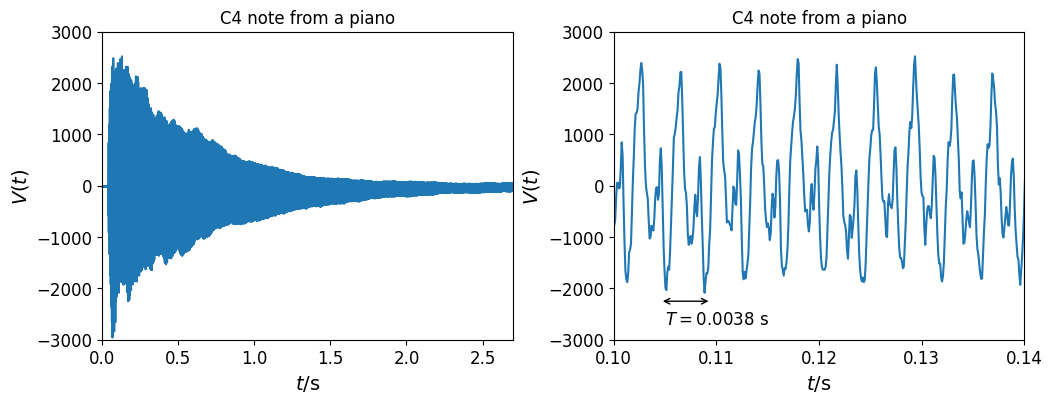

In [9]:
t = np.arange(0, tN, dt) # define the time array

fig, ax = plt.subplots(1, 2, figsize=(12.1, 4))

for n in range(0, 2, 1):
    ax[n].set_title("C4 note from a piano")
    ax[n].set_xlabel('$t/$s', fontsize=14)
    ax[n].set_ylabel('$V(t)$', fontsize=14)
    ax[n].set_ylim(-3000, 3000) # set the range of the y-axis
    ax[n].tick_params(axis='both', which='major', labelsize=12)
    ax[n].plot(t, V) # plot V as a function of t

ax[0].set_xlim(0, 2.7) # set the range of the x-axis
ax[0].set_aspect(2.7/8000) # set aspect ratio
ax[1].set_xlim(0.1, 0.14)
ax[1].set_aspect(0.04/8000)

ax[1].annotate('', c='black', xy=(0.1095,-2250), xytext=(0.1045,-2250),
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='<->'))

ax[1].annotate('$T=0.0038$ s', c='black', fontsize=12, xy=(0.105,-2700))

plt.show()

We can compare this sound wave with the C4 note from a flute, as shown below.
As we can see the shape of the wave looks different, but the period (and hence the fundamental frequency) remains approximately the same, _i.e._ they both correspond to C4.

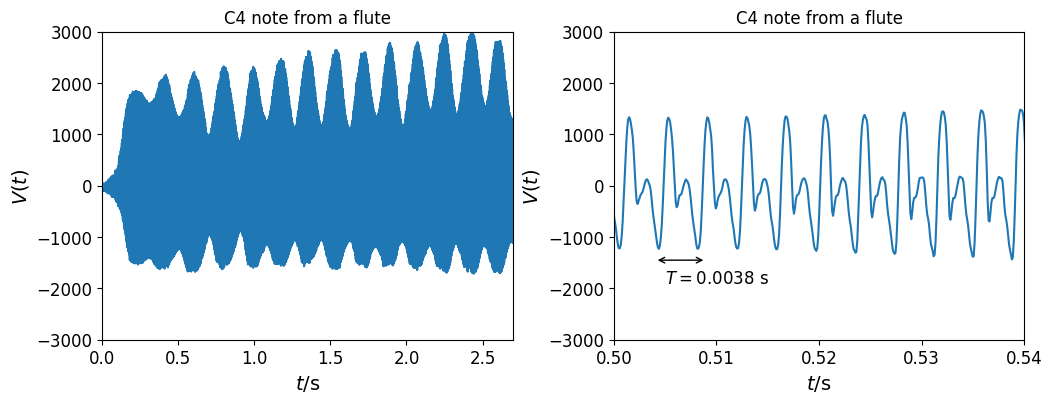

In [11]:
framerate1, V1 = wavfile.read('./samples/flute-C4.wav')

N1 = len(V1)  # get the total number of points
tN1 = N1/framerate1  # calculate the total sampling time
dt1 = 1/framerate1  # calculate the timestep

t1 = np.arange(0, tN1, dt1)

fig, ax = plt.subplots(1, 2, figsize=(12.1, 4))

for n in range(0, 2, 1):
    ax[n].set_title("C4 note from a flute")
    ax[n].set_xlabel('$t/$s', fontsize=14)
    ax[n].set_ylabel('$V(t)$', fontsize=14)
    ax[n].set_ylim(-3000, 3000)
    ax[n].tick_params(axis='both', which='major', labelsize=12)
    ax[n].plot(t1, V1)

ax[0].set_xlim(0, 2.7)
ax[0].set_aspect(2.7/8000)
ax[1].set_xlim(0.5, 0.54)
ax[1].set_aspect(0.04/8000)

ax[1].annotate('', c='black', xy=(0.509,-1450), xytext=(0.504,-1450),
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='<->'))

ax[1].annotate('$T=0.0038$ s', c='black', fontsize=12, xy=(0.505,-1900))

plt.show()

## Using FFT library in NumPy

From above, we have a discrete audio signal $V(t_n)$, which we stored inside a NumPy array, called `V`.
To find its Fourier transform, $\tilde{V}(\omega_p)$, we write the following line of code:

`Vtilde = numpy.fft.fft(V, norm='forward')`

Basically, the method above will calculate the discrete Fourier transform of $V(t_n)$, which is:
\begin{equation}
\tilde{V}(\omega_p) = \frac{1}{N}\sum_{n=0}^{N-1} V(t_n) e^{-i\frac{2\pi}{N}pn},
\end{equation}
and then stored the values of $\tilde{V}(\omega_p)$ inside another NumPy array, which we called `Vtilde` 
(you can rename the variables to whichever you like).
The option `norm='forward'` is used to add the $1/N$ normalization.
Let us now have a look inside the array `Vtilde`:
\begin{equation}
\text{NumPy array Vtilde} =
\underbrace{
\begin{array}{|c|c|c|c|c|c|c|c|c|}
\hline
\tilde{V}(\omega_0) & \tilde{V}(\omega_1) & \tilde{V}(\omega_2) & \dots & \tilde{V}(\omega_{N/2-1})
& \tilde{V}(\omega_{-N/2}) & \tilde{V}(\omega_{-N/2+1}) & \dots & \tilde{V}(\omega_{-1}) \\
\hline
\end{array}}_{\text{length}=N},
\end{equation}
where $\omega_p=\frac{2\pi p}{N\Delta t}$.
Notice that NumPy has arranged $\tilde{V}(\omega_p)$ inside our array `Vtilde` in a slightly peculiar way.
First NumPy arranges $\tilde{V}(\omega_p)$ in increasing order of positive $\omega_p$ for the first half of the array, and then jumps to $\tilde{V}(\omega_{-N/2})$, and starts again in increasing order of negative $\omega_p$.

We will come back to this ordering later, but for now, we can calculate the energy spectrum $\tilde{E}(\omega)$ by writing the following line of code:

`Etilde = Vtilde*np.conjugate(Vtilde)`

Note that the method `numpy.conjugate()` is used to take complex conjugate. 
Also note that although $\tilde{E}$ is real, Python still keeps the imaginary part of $\tilde{E}$, which is $0$ in this case.
This may cause some warning when we do the plot later (although they will still display the plot correctly).
To remove this warning, we have to take only the real part of $\tilde{E}$:

`Etilde = np.real(Vtilde*np.conjugate(Vtilde))`.

Now we want to plot the energy spectrum $\tilde{E}$ as a function of frequency $f_p=\frac{\omega_p}{2\pi}=\frac{p}{N\Delta t}$.
However, as we recall above, the energy spectrum array `Etilde` is not arranged in increasing order of frequency, 
_i.e._
\begin{equation}
\text{NumPy array Etilde} =
\underbrace{
\begin{array}{|c|c|c|c|c|c|c|c|c|}
\hline
\tilde{E}(\omega_0) & \tilde{E}(\omega_1) & \tilde{E}(\omega_2) & \dots & \tilde{E}(\omega_{N/2-1})
& \tilde{E}(\omega_{-N/2}) & \tilde{E}(\omega_{-N/2+1}) & \dots & \tilde{E}(\omega_{-1}) \\
\hline
\end{array}}_{\text{length}=N},
\end{equation}
Thus before we do any plotting, we need to shift each element of the array to the right by $N/2$.
We do this using the method:

`Etilde = np.roll(Etilde, int(N/2), axis=0)`

We will then get `Etilde` in increasing order of the frequency. 
\begin{equation}
\text{NumPy array Etilde} =
\underbrace{
\begin{array}{|c|c|c|c|c|c|c|c|}
\hline
\tilde{E}(\omega_{-N/2}) & \tilde{E}(\omega_{-N/2+1}) & \dots & \tilde{E}(\omega_{-1})
& \tilde{E}(\omega_{0}) & \tilde{E}(\omega_{1}) & \dots & \tilde{E}(\omega_{N/2-1}) \\
\hline
\end{array}}_{\text{length}=N},
\end{equation}

Finally, we can define the frequency array `f` in increasing magnitude:
\begin{align}
\text{NumPy array f} &=
\begin{array}{|c|c|c|c|c|c|c|c|}
\hline
f_{-N/2} & f_{-N/2+1} & \dots & f_{-1} & f_{0}
& f_{1} & \dots & f_{N/2-1} \\
\hline
\end{array} \\ &=
\underbrace{
\begin{array}{|c|c|c|c|c|c|c|c|c|}
\hline
\frac{-N/2}{N\Delta t} & \frac{-N/2+1}{N\Delta t} & \dots & \frac{-1}{N\Delta t} & 0 & \frac{1}{N\Delta t} & \dots & \frac{N/2-1}{N\Delta t} \\
\hline
\end{array}}_{\text{length}=N},
\end{align}
and then we call the method `plot(f, Etilde)` to plot $\tilde{E}$ as a function of $f$, which we can see the results in the figure below.

From the figure we can see that the energy spectrum has several peaks.
The first peak at $f\simeq261.6\,\text{Hz}$ corresponds to the fundamental frequency of the C4 note.
The second peak at $f\simeq523.2\,\text{Hz}$ corresponds to the first harmonic, which has the same frequency as the C5 note.
The third peak at $f\simeq784.8\,\text{Hz}$ correponds to the second harmonic, which has the same frequency as the G5 note.
Surprisingly, the G note is always contained inside the C note at varying degrees of proportion, depending on the musical instrument.
In fact, Bach _et al._ discovered that when we play the note C and G together, they always sound nice.
This is called harmony in music theory.

__Exercise 8.__
The energy spectrum $\tilde{E}$ below shows a finite value at zero frequency $f=\omega=0$. 
What is the significance of this zero-frequency mode in the Fourier series?

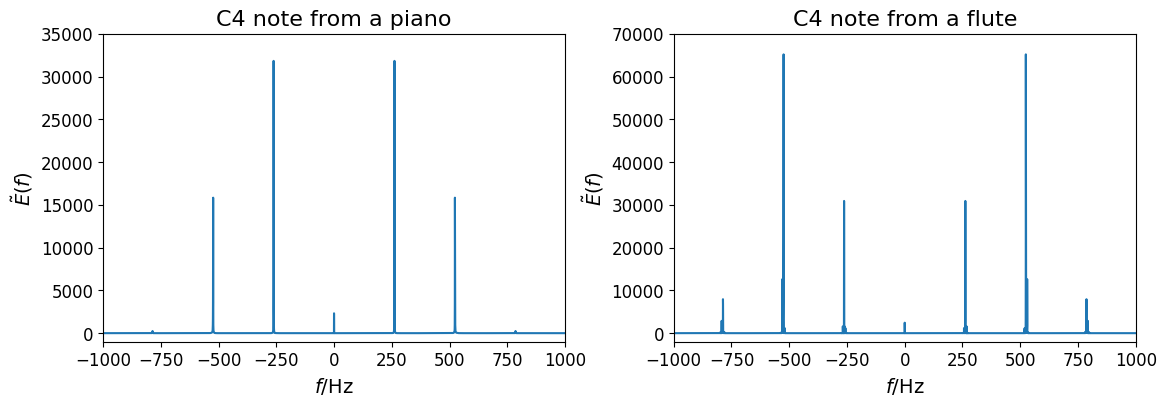

In [12]:
N = np.shape(V)[0]
f = 1/(N*dt)*np.arange(-N/2, N/2, 1)  # define the frequency array

N1 = np.shape(V1)[0]
f1 = 1/(N1*dt1)*np.arange(-N1/2, N1/2, 1)

Vtilde = np.fft.fft(V, norm='forward') # Fourier transform of V(t), Vtilde(omega)
Vtilde1 = np.fft.fft(V1, norm='forward') 

Etilde = np.real(Vtilde*np.conjugate(Vtilde)) # power spectrum of V(t), Etilde(omega)
Etilde1 = np.real(Vtilde1*np.conjugate(Vtilde1))

Etilde = np.roll(Etilde, int(N/2), axis=0) # shift the spectrum so that the zero frequency is in the middle
Etilde1 = np.roll(Etilde1, int(N1/2), axis=0)   

fig, ax = plt.subplots(1, 2, figsize=(13.5, 4))

for n in range(0, 2, 1):
    ax[n].set_xlabel('$f/$Hz', fontsize=14)
    ax[n].set_ylabel('$\\tilde{E}(f)$', fontsize=14)
    ax[n].set_xlim(-1000, 1000)
    ax[n].tick_params(axis='both', which='major', labelsize=12)

ax[0].set_title('C4 note from a piano', fontsize=16)
ax[1].set_title('C4 note from a flute', fontsize=16)

ax[0].set_ylim(-1000, 35000)
ax[1].set_ylim(-2000, 70000)

ax[0].set_aspect((2/3)*2000/36000)
ax[1].set_aspect((2/3)*2000/72000)

ax[0].plot(f, Etilde)
ax[1].plot(f1, Etilde1)

plt.show()

### References

1. [Digital Audio Fundamentals, Audacity]
2. [Sound Examples, Dan Ellis, Columbia University]
3. [Playing and Recording Sound in Python, Real Python]
4. [Electronic Music Studios, University of Iowa]


[Electronic Music Studios, University of Iowa]: https://theremin.music.uiowa.edu/MIS.html
[Digital Audio Fundamentals, Audacity]: https://manual.audacityteam.org/man/digital_audio.html
[Sound Examples, Dan Ellis, Columbia University]: https://www.ee.columbia.edu/~dpwe/sounds/
[Playing and Recording Sound in Python, Real Python]: https://realpython.com/playing-and-recording-sound-python/